## Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/train.csv')
data2 = pd.read_csv('dataset/test.csv')

### Explore the Train Data

Problem Statement: it is to build a predictive model that identifies key factors associated with survival on the Titanic. I aim to explore how variables such as age, gender, class, fare, and family connections influence the likelihood of survival. It will not only predict survival outcomes but also understand the demographic and socio-economic characteristics that were most likely to increase survival chances.

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Data Preprocessing

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.duplicated().sum()

0

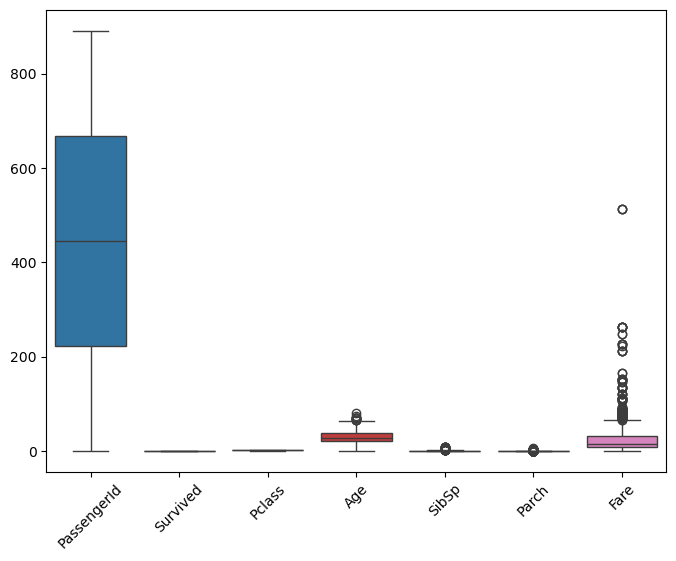

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

In [9]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in PassengerId: 0
Outliers in Survived: 0
Outliers in Pclass: 0
Outliers in Age: 11
Outliers in SibSp: 46
Outliers in Parch: 213
Outliers in Fare: 116


In [10]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [12]:
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation: Missing values from age are filled in with the median age within each Pclass as there are outliers. Imputing Age by Pclass is more nuanced approach compared to using a global median imputation. Fractional age is kept in case it affected to survival of parents.

In [13]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
data.drop(columns=['Cabin'], inplace=True)

Observation: Since there are high number, 687 of 891, NaNs in Cabin, and a lot of values are mixed and inconsistent, Cabin column is dropped.

In [15]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Observation: The most common port can be a reasonable guess for two missing values.

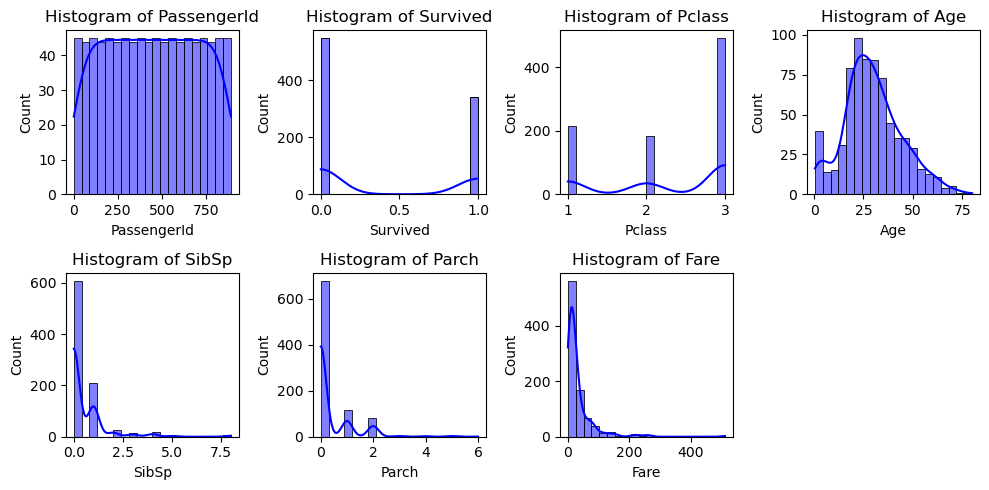

In [ ]:
plt.figure(figsize=(10,5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()

Observation: In titanic, it seems the majority of passengers being in their 20s. Younger passengers could have had different survival chances compared to older adults. This could be useful to anlyze by looking at the survival rates for different age groups.

Most passengers had no siblings, spouse, parents, or children. If family members were prioritized for lifeboat access or rescue, the survival rate could have been different. It coulld analyze how the rate differ for solo travelers versus families.

A lot of passengers paid less than $100 and there were much more people in 3rd/lower pclass. Lower fares generally correspond to lower class tickets, and 3rd class have a lower survival rate compared to 1st and 2nd class.

### Exploratory Data Analysis (EDA)

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


ValueError: Could not interpret value `FamilySize` for `x`. An entry with this name does not appear in `data`.

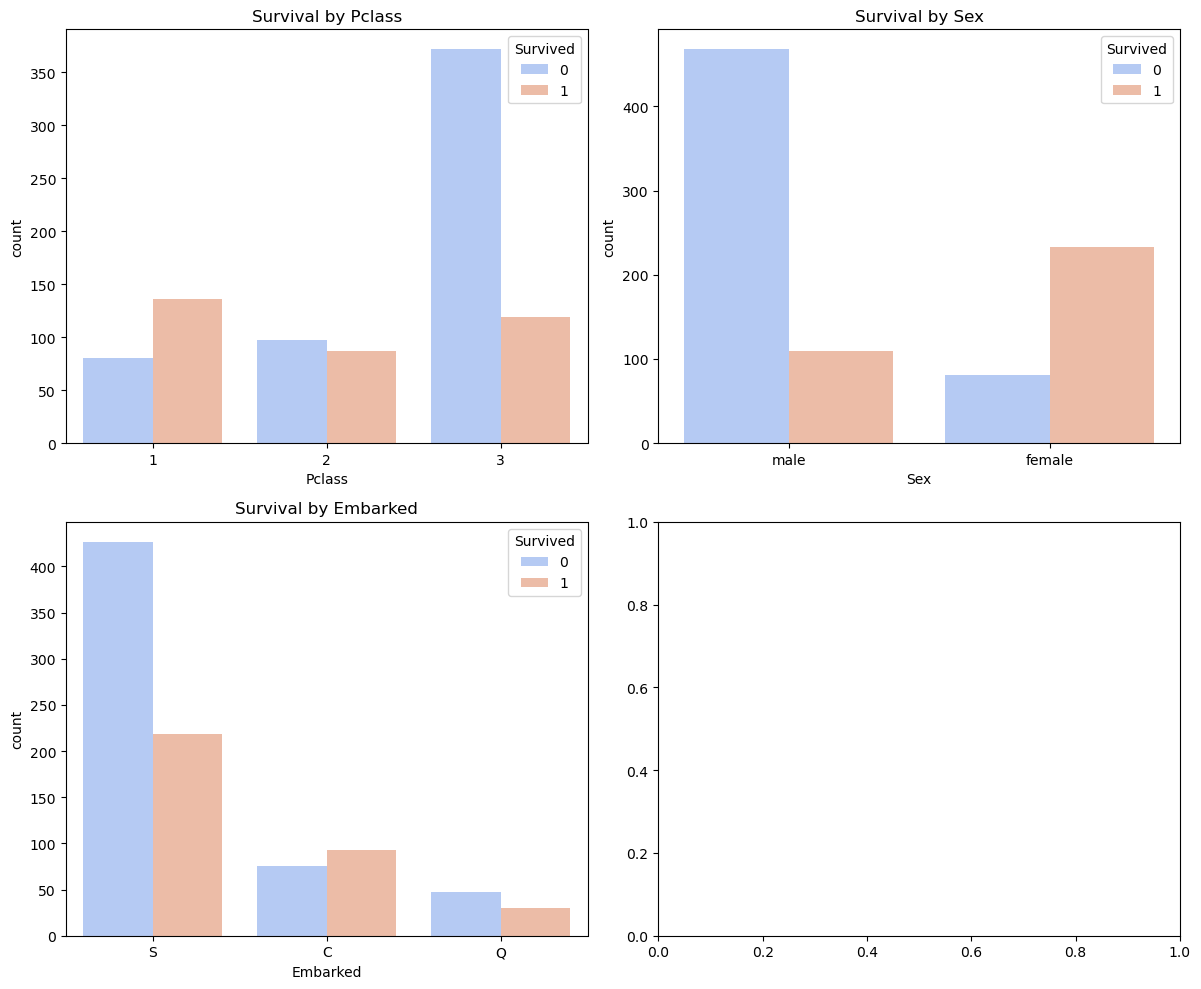

In [20]:
# List of categorical columns
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'FamilySize']

# Count plots for categorical features
plt.figure(figsize=(12, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, hue='Survived', data=data, palette='coolwarm')
    plt.title(f'Survival by {column}')
    plt.tight_layout()
plt.show()

# Box plots for numerical features like 'Age' and 'Fare'
plt.figure(figsize=(12, 6))

# Age distribution by Survived
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Survival by Age')

# Fare distribution by Survived
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Survival by Fare')

plt.tight_layout()
plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

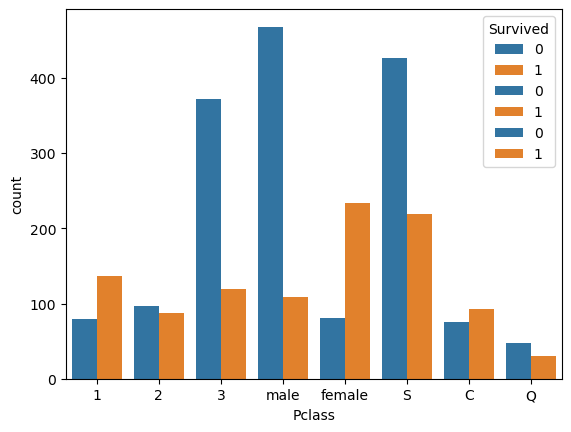

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=data)
sns.countplot(x='Sex', hue='Survived', data=data)
sns.countplot(x='Embarked', hue='Survived', data=data)


Observation:

### Model Training

### Evaluate on Train Data

### Test Data